# Principle component analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import  datasets

%matplotlib inline
%config InlineBackend.figureformat = 'retina'

# Load Dataset

In [2]:
dataobj = datasets.load_wine()

In [11]:
X = pd.DataFrame(dataobj.data, columns = list(dataobj.feature_names))
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [8]:
y = pd.DataFrame(dataobj.target, columns=['target'])
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [10]:
df = pd.concat([X, y], axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Split data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

# Standardized

In [13]:
scl = StandardScaler()
scl.fit(X_train)

StandardScaler()

In [14]:
X_train_s = scl.transform(X_train)
X_test_s = scl.transform(X_test)

# SKlearn : PCA

In [15]:
## selecting number of component
n_component = 13

In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=n_component)

In [18]:
pca.fit(X_train_s)

PCA(n_components=13)

In [25]:
## Tranformation metrix
W = np.transpose(pca.components_)
pd.DataFrame(data = W, index = X.columns, columns = [f'PC{n}' for n in range(1, n_component+1)])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.141194,-0.467321,-0.184980,-0.061352,-0.257303,-0.357047,-0.121292,-0.358422,0.296364,-0.458159,-0.269139,0.128884,-0.006275
malic_acid,-0.249468,-0.268769,0.115584,0.507363,-0.046318,-0.447281,0.500084,-0.018835,0.080892,0.220110,0.257228,-0.067318,0.128130
ash,0.051049,-0.276602,0.625806,-0.233587,-0.079396,-0.181154,-0.125147,0.242581,0.076458,0.405821,-0.364515,0.120112,-0.207911
alcalinity_of_ash,-0.198909,0.019551,0.630225,0.066191,0.140370,0.065524,-0.288249,-0.497006,-0.141239,-0.276443,0.307703,0.023287,0.113120
magnesium,0.144449,-0.321205,0.068083,-0.218086,0.751313,0.092533,0.415863,0.065579,-0.029320,-0.252699,-0.090543,-0.018192,0.015611
total_phenols,0.404726,-0.048393,0.144543,0.101007,-0.135768,0.066346,0.031867,0.346776,0.203024,-0.261746,0.560504,0.298365,-0.381759
flavanoids,0.426542,0.009368,0.161097,0.075116,-0.083848,0.045646,-0.061533,0.224804,0.105178,-0.020947,-0.020322,0.042226,0.842167
nonflavanoid_phenols,-0.295734,-0.001468,0.208305,-0.330329,-0.514238,0.260610,0.500126,0.139908,-0.113048,-0.351735,-0.063412,-0.103343,0.082310
proanthocyanins,0.326201,-0.040876,0.103928,0.451178,-0.120711,0.537125,0.264975,-0.377164,0.022442,0.148812,-0.322409,0.102297,-0.157986
color_intensity,-0.074207,-0.539821,-0.074630,-0.013233,-0.059359,0.394071,-0.248868,0.068606,0.229056,0.141821,0.237786,-0.585436,0.005292


In [26]:
# Explained Variance
pca.explained_variance_

array([4.7095539 , 2.63606471, 1.55728758, 0.93422662, 0.85129454,
       0.5709688 , 0.46462025, 0.37764772, 0.27571434, 0.2630501 ,
       0.21165109, 0.14951983, 0.10409155])

In [27]:
# Explained Variance Ratio
pca.explained_variance_ratio_

array([0.35935182, 0.20113893, 0.11882529, 0.07128404, 0.0649561 ,
       0.04356648, 0.03545179, 0.02881555, 0.02103776, 0.02007144,
       0.01614956, 0.01140877, 0.00794247])

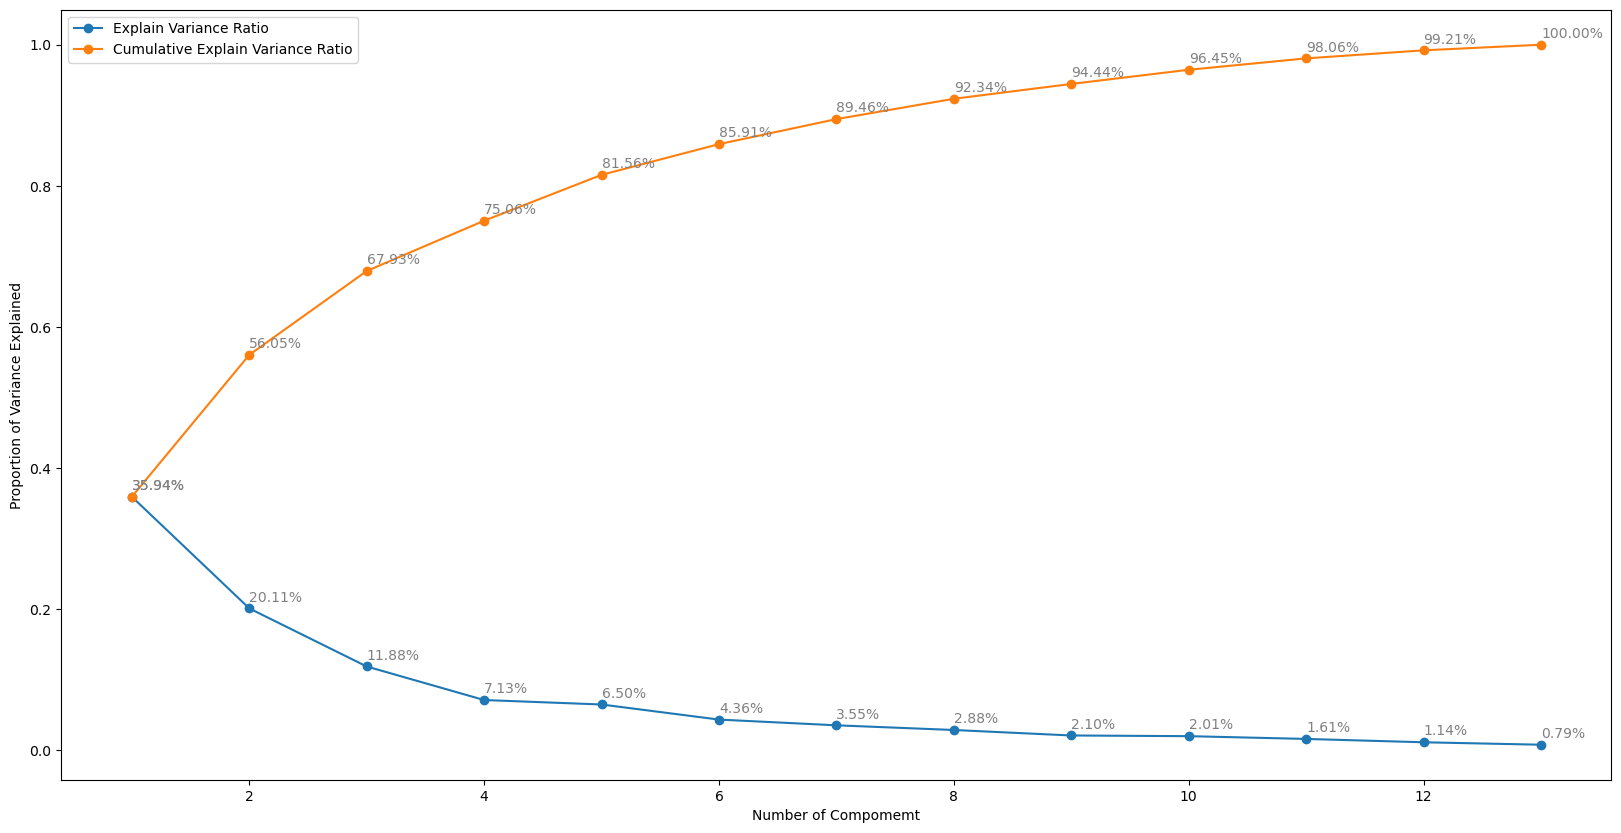

In [50]:
## Ploting
x = np.arange(1, n_component+1)
y1 = pca.explained_variance_ratio_
y2 = np.cumsum(y1)
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.plot(x, y1, label='Explain Variance Ratio', marker='o')
ax.plot(x, y2, label='Cumulative Explain Variance Ratio', marker='o')
ax.set_xlabel('Number of Compomemt')
ax.set_ylabel('Proportion of Variance Explained')

for x, y1, y2 in zip(x, y1, y2):
    ax.text(x, y1+.01, f'{y1*100:.2f}%', color='.5')
    ax.text(x, y2+.01, f'{y2*100:.2f}%', color='.5')
ax.legend();

In [51]:
## Transform data
X_train_pca = pca.transform(X_train_s)
X_test_pca = pca.transform(X_test_s)

In [55]:
X_train_pca = pd.DataFrame(X_train_pca, columns = [f'PC{e}' for e in range(1, n_component+1)])
X_train_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.856412,-2.669846,-0.308831,0.342461,-0.369114,0.071228,-0.381202,0.588620,-0.504951,-0.644225,0.543437,0.175506,-0.363718
1,-2.526142,1.153164,-1.793295,0.746709,-0.661625,-0.835296,0.065943,0.782285,0.145440,-0.209569,-0.155300,0.186631,0.369228
2,-3.455007,-1.904295,0.117710,0.960886,-1.070487,0.333508,1.061827,-0.260142,-0.208851,-0.032066,0.481323,0.032722,0.083054
3,-1.541746,1.374133,0.262643,-0.040604,-0.642094,0.403131,-0.454575,-0.705509,-0.308580,-0.297220,-0.878801,0.073622,0.477916
4,2.671720,-0.962243,0.778134,0.668512,-0.586165,0.611203,0.269989,-0.300891,-0.446647,0.883452,-0.465642,0.143125,-0.069774
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-1.712833,1.118662,0.802872,1.324494,-0.685097,-0.863560,0.281963,0.332098,-0.538409,0.491504,0.476692,0.351986,0.238912
120,-0.672288,1.067128,0.050571,-0.081529,0.174515,-0.905320,-1.640321,-0.932190,0.329208,-0.772997,-0.036610,-0.058637,0.240255
121,1.431494,0.743951,-1.606905,-0.767965,0.017223,-0.403332,-0.036030,-0.025633,-0.169427,0.207289,0.311606,0.192127,0.406531
122,0.959154,2.141738,-0.063930,0.380864,1.214736,-0.262139,-0.333269,0.993521,0.892712,0.606496,0.867937,0.018516,-0.494356


In [57]:
X_train_pca.shape

(124, 13)

## Using PCA for helping visualization

In [76]:
n_component = 2
pca = PCA(n_components=n_component)
X_s = StandardScaler().fit_transform(X)
X_pca = pca.fit_transform(X_s)
X_pca = pd.DataFrame(X_pca, columns=[f'PC{e}' for e in range(1, n_component + 1)])
X_pca = pd.concat([X_pca, y], axis =1)
X_pca

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0
...,...,...,...
173,-3.370524,-2.216289,2
174,-2.601956,-1.757229,2
175,-2.677839,-2.760899,2
176,-2.387017,-2.297347,2


<Axes: xlabel='PC1', ylabel='PC2'>

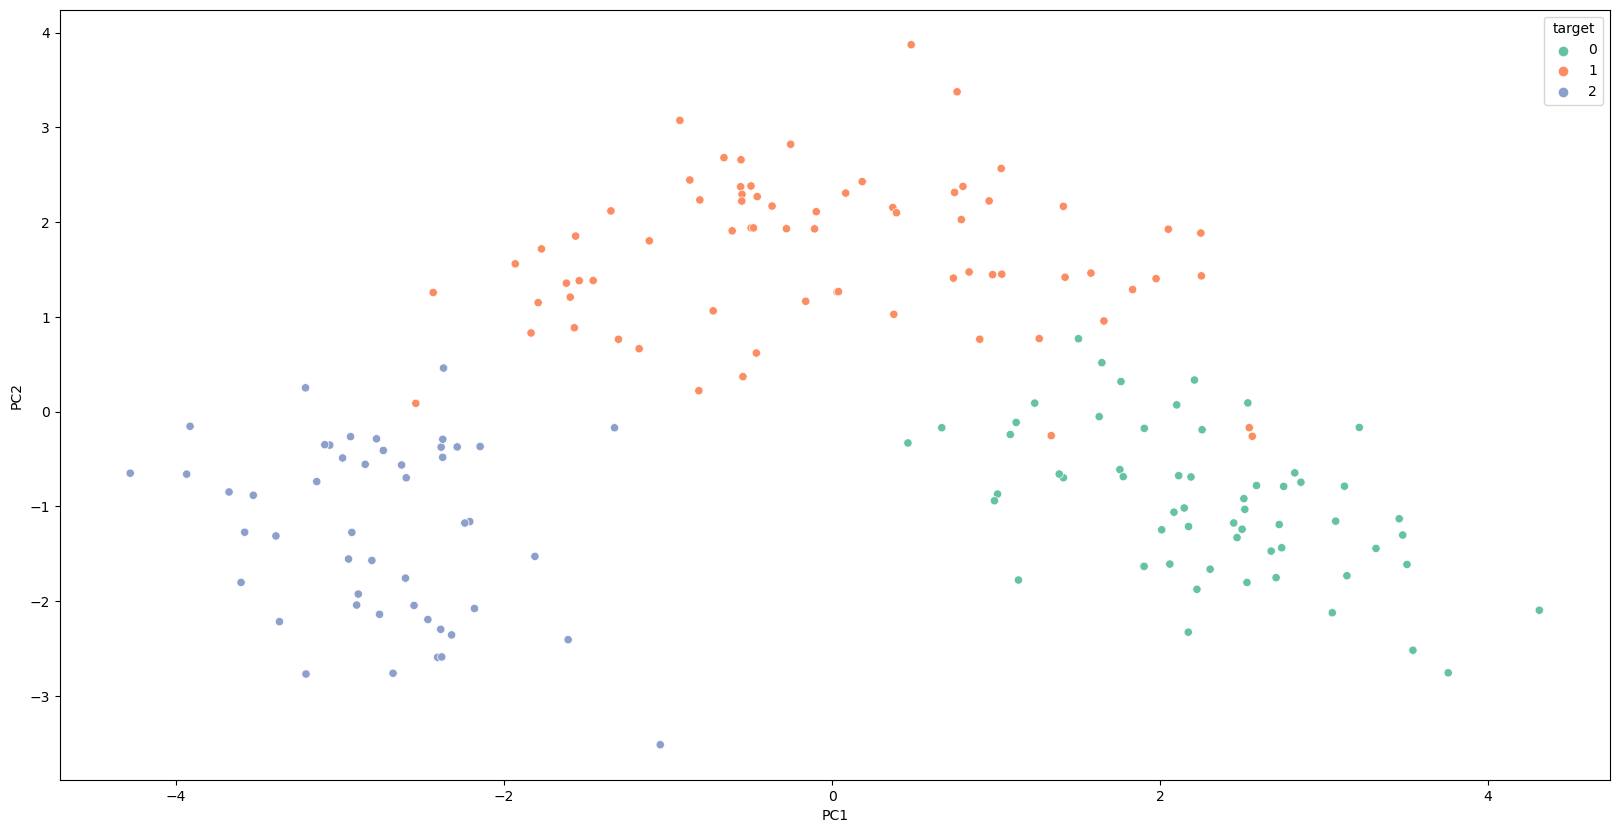

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

sns.scatterplot(data=X_pca, x='PC1', y='PC2', hue='target', palette='Set2', sizes=100)
